# GIT + QISKIT CONFIGURATION

In [ ]:
!pip install qiskit
!pip install qiskit-aer

# QuantumReservoirPy Configuration

https://github.com/OpenQuantumComputing/quantumreservoirpy

In [ ]:
!git clone https://github.com/OpenQuantumComputing/quantumreservoirpy.git
%cd quantumreservoirpy
!pip install .

Cloning into 'quantumreservoirpy'...
remote: Enumerating objects: 661, done.
remote: Counting objects: 100% (278/278), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 661 (delta 111), reused 191 (delta 84), pack-reused 383
Receiving objects: 100% (661/661), 74.36 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (273/273), done.
Updating files: 100% (94/94), done.
/content/quantumreservoirpy
Processing /content/quantumreservoirpy
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.1 MB/s eta 0:00:00
  Created wheel for quantumreservoirpy: filename=quantumreservoirpy-0.1-py3-none-any.whl size=20963 sha256=8b1a06c4181451255a62b543f60579e75a6b10963422f3b89fa3fe4a7f83b2b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-i0575tkz/wheels/cb/c3/98/2489ddeec73f2edc2c871da7db1ec050c545ba330544755648
  Cr

# Examples/reservoircomparison.ipynb

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from qiskit.quantum_info import random_unitary
from qiskit_aer import AerSimulator

from quantumreservoirpy.plot import feature_plotter
from quantumreservoirpy.reservoirs import Static

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
num_qubits = 5
operator = random_unitary(2 ** num_qubits, seed=417)
backend = AerSimulator()

In [ ]:
class QuantumReservoir(Static):

    def before(self, circuit):
        circuit.h(circuit.qubits)

    def during(self, circuit, timestep):
        circuit.initialize(int(timestep % 2), 1)
        circuit.append(operator, circuit.qubits)
        circuit.measure([0, 1])

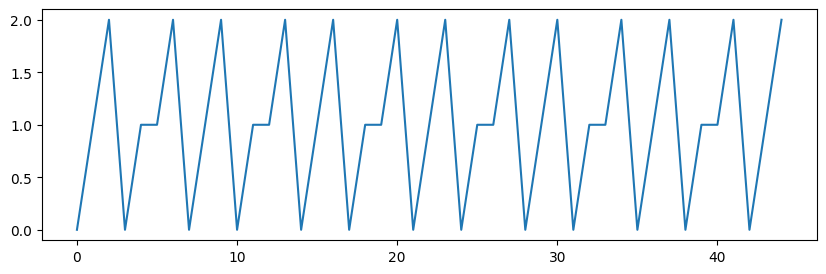

In [ ]:
sequence = np.array([0, 1, 2, 0, 1, 1, 2] * 25)

plt.figure(figsize=(10, 3))
plt.plot(sequence[:45])
plt.show()

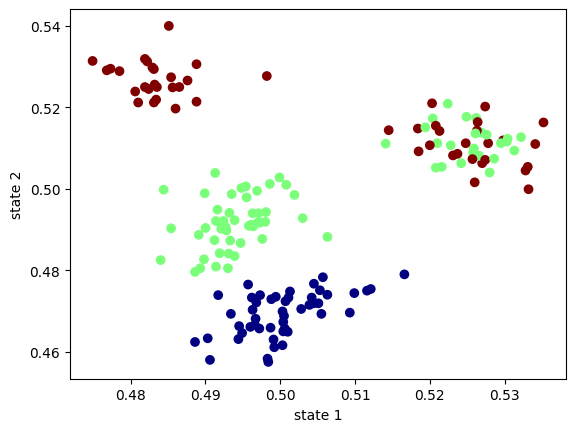

In [ ]:
quantum_res = QuantumReservoir(n_qubits=num_qubits, backend=backend)
quantum_data = quantum_res.run(timeseries=sequence, shots=10000)

warmup = 5
x = quantum_data.reshape(-1, 2)[warmup:]
y = np.roll(sequence.reshape(-1), -1)[warmup:]
feature_fig, feature_ax = feature_plotter(x, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=33)

KNN Classifier Score: 0.8070175438596491


Predicting...: 100%|██████████| 45/45 [02:56<00:00,  3.92s/it]


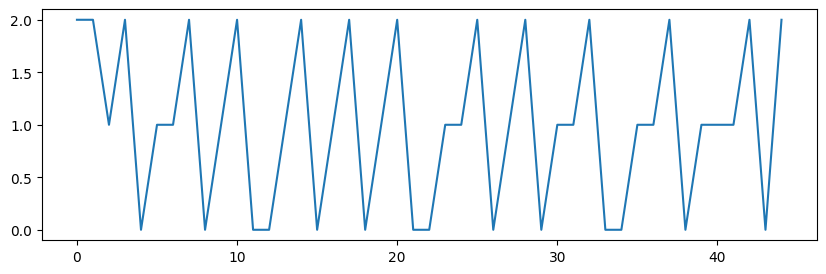

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print("KNN Classifier Score:", model.score(X_test, y_test))

quantum_predict_knn = quantum_res.predict(
    num_pred=45,
    model=model,
    from_series=sequence,
    shots=10000
)

plt.figure(figsize=(10, 3))
plt.plot(quantum_predict_knn)
plt.plot(sequence[:45])
plt.show()

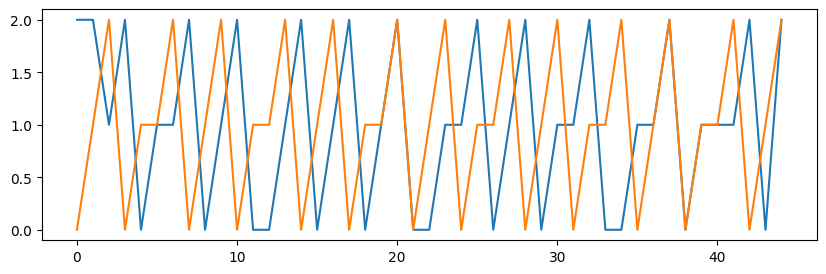

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(quantum_predict_knn)
plt.plot(sequence[:45])
plt.show()

# Lorenz

In [ ]:
import numpy as np

In [ ]:
from qiskit.quantum_info import random_unitary
from qiskit_aer import AerSimulator

from quantumreservoirpy.plot import feature_plotter
from quantumreservoirpy.reservoirs import Static

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
%pip install reservoirpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from reservoirpy.datasets import lorenz

In [ ]:
#New Constants

n_timesteps = 1000
trainLength = 900
testLength = 100
seed = 69

number_of_features = 3
reservoir_dim = 300
edge_creation_prob = 0.1
spectral_radius = 1.2

sigma, rho, beta, h = 10, 28, 8/3, 0.02

In [ ]:
##### DATASET #####
def dataset(n_timesteps):
    n_timesteps = n_timesteps
    data = lorenz(n_timesteps=n_timesteps, sigma=sigma, rho=rho, beta=beta, h=h)

    return data

In [ ]:
data = dataset(n_timesteps)

In [ ]:
train = data[:trainLength,:]
test = data[trainLength:,:]

In [ ]:
num_qubits = 5
operator = random_unitary(2 ** num_qubits, seed=417)
backend = AerSimulator()

In [ ]:
class QuantumReservoir(Static):

    def before(self, circuit):
        circuit.h(circuit.qubits)

    def during(self, circuit, timestep):
        circuit.initialize(int(timestep % 2), 1)
        circuit.append(operator, circuit.qubits)
        circuit.measure([0, 1])

In [ ]:
data_x = np.transpose(train)[0]

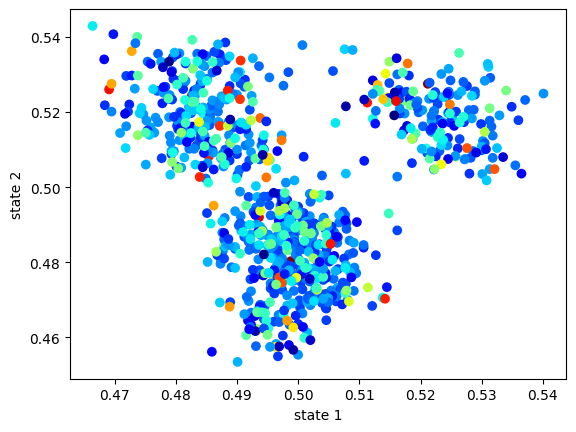

In [ ]:
quantum_res = QuantumReservoir(n_qubits=num_qubits, backend=backend)
quantum_data = quantum_res.run(timeseries=data_x, shots=10000)

warmup = 5
x = quantum_data.reshape(-1, 2)[warmup:]
y = np.roll(data_x.reshape(-1), -1)[warmup:]
feature_fig, feature_ax = feature_plotter(x, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=33)

In [ ]:
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop, SGD, Adagrad, Adadelta

In [ ]:
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae','mean_squared_error'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 100)               300       
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 30707 (119.95 KB)
Trainable params: 3070

In [ ]:
model.fit(X_train, y_train, epochs=200, validation_split=0.2)

In [ ]:
import matplotlib as plt

In [ ]:
quantum_predicts = quantum_res.predict(
    num_pred=100,
    model=model,
    from_series=data_x,
    shots=10000
)

Predicting...:   0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 259ms/step


Predicting...:   1%|          | 1/100 [00:24<40:45, 24.70s/it]

1/1 [==============================] - 0s 33ms/step


Predicting...:   2%|▏         | 2/100 [00:46<37:37, 23.04s/it]

1/1 [==============================] - 0s 28ms/step


Predicting...:   3%|▎         | 3/100 [01:05<34:33, 21.38s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:   4%|▍         | 4/100 [01:24<32:13, 20.14s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:   5%|▌         | 5/100 [01:42<30:46, 19.44s/it]

1/1 [==============================] - 0s 35ms/step


Predicting...:   6%|▌         | 6/100 [02:01<30:14, 19.30s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:   7%|▋         | 7/100 [02:19<29:26, 19.00s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:   8%|▊         | 8/100 [02:37<28:23, 18.52s/it]

1/1 [==============================] - 0s 38ms/step


Predicting...:   9%|▉         | 9/100 [03:00<30:27, 20.08s/it]

1/1 [==============================] - 0s 33ms/step


Predicting...:  10%|█         | 10/100 [03:18<29:01, 19.35s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  11%|█         | 11/100 [03:37<28:18, 19.09s/it]

1/1 [==============================] - 0s 43ms/step


Predicting...:  12%|█▏        | 12/100 [03:55<27:54, 19.03s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  13%|█▎        | 13/100 [04:15<27:51, 19.21s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  14%|█▍        | 14/100 [04:34<27:12, 18.98s/it]

1/1 [==============================] - 0s 31ms/step


Predicting...:  15%|█▌        | 15/100 [04:53<26:56, 19.02s/it]

1/1 [==============================] - 0s 29ms/step


Predicting...:  16%|█▌        | 16/100 [05:12<26:43, 19.09s/it]

1/1 [==============================] - 0s 22ms/step


Predicting...:  17%|█▋        | 17/100 [05:30<26:10, 18.93s/it]

1/1 [==============================] - 0s 20ms/step


Predicting...:  18%|█▊        | 18/100 [05:48<25:27, 18.63s/it]

1/1 [==============================] - 0s 39ms/step


Predicting...:  19%|█▉        | 19/100 [06:08<25:34, 18.95s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  20%|██        | 20/100 [06:26<24:52, 18.66s/it]

1/1 [==============================] - 0s 27ms/step


Predicting...:  21%|██        | 21/100 [06:44<24:27, 18.57s/it]

1/1 [==============================] - 0s 37ms/step


Predicting...:  22%|██▏       | 22/100 [07:03<23:58, 18.45s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  23%|██▎       | 23/100 [07:22<24:09, 18.83s/it]

1/1 [==============================] - 0s 28ms/step


Predicting...:  24%|██▍       | 24/100 [07:40<23:30, 18.56s/it]

1/1 [==============================] - 0s 22ms/step


Predicting...:  25%|██▌       | 25/100 [07:59<23:18, 18.64s/it]

1/1 [==============================] - 0s 31ms/step


Predicting...:  26%|██▌       | 26/100 [08:18<23:16, 18.88s/it]

1/1 [==============================] - 0s 28ms/step


Predicting...:  27%|██▋       | 27/100 [08:37<22:51, 18.79s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  28%|██▊       | 28/100 [08:55<22:17, 18.57s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:  29%|██▉       | 29/100 [09:15<22:21, 18.90s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:  30%|███       | 30/100 [09:33<21:38, 18.55s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  31%|███       | 31/100 [09:51<21:18, 18.53s/it]

1/1 [==============================] - 0s 34ms/step


Predicting...:  32%|███▏      | 32/100 [10:10<21:01, 18.55s/it]

1/1 [==============================] - 0s 21ms/step


Predicting...:  33%|███▎      | 33/100 [10:29<21:05, 18.89s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:  34%|███▍      | 34/100 [10:47<20:28, 18.61s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  35%|███▌      | 35/100 [11:06<20:04, 18.54s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:  36%|███▌      | 36/100 [11:25<20:02, 18.79s/it]

1/1 [==============================] - 0s 21ms/step


Predicting...:  37%|███▋      | 37/100 [11:43<19:37, 18.70s/it]

1/1 [==============================] - 0s 21ms/step


Predicting...:  38%|███▊      | 38/100 [12:01<18:59, 18.38s/it]

1/1 [==============================] - 0s 43ms/step


Predicting...:  39%|███▉      | 39/100 [12:21<19:15, 18.94s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  40%|████      | 40/100 [12:40<18:58, 18.98s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:  41%|████      | 41/100 [12:59<18:34, 18.89s/it]

1/1 [==============================] - 0s 35ms/step


Predicting...:  42%|████▏     | 42/100 [13:18<18:14, 18.88s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  43%|████▎     | 43/100 [13:37<18:03, 19.00s/it]

1/1 [==============================] - 0s 32ms/step


Predicting...:  44%|████▍     | 44/100 [13:55<17:27, 18.71s/it]

1/1 [==============================] - 0s 34ms/step


Predicting...:  45%|████▌     | 45/100 [14:14<17:06, 18.66s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  46%|████▌     | 46/100 [14:33<16:55, 18.81s/it]

1/1 [==============================] - 0s 29ms/step


Predicting...:  47%|████▋     | 47/100 [14:52<16:41, 18.90s/it]

1/1 [==============================] - 0s 35ms/step


Predicting...:  48%|████▊     | 48/100 [15:11<16:23, 18.91s/it]

1/1 [==============================] - 0s 22ms/step


Predicting...:  49%|████▉     | 49/100 [15:31<16:25, 19.32s/it]

1/1 [==============================] - 0s 22ms/step


Predicting...:  50%|█████     | 50/100 [15:50<15:52, 19.05s/it]

1/1 [==============================] - 0s 33ms/step


Predicting...:  51%|█████     | 51/100 [16:09<15:40, 19.19s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:  52%|█████▏    | 52/100 [16:28<15:20, 19.19s/it]

1/1 [==============================] - 0s 28ms/step


Predicting...:  53%|█████▎    | 53/100 [16:47<14:55, 19.05s/it]

1/1 [==============================] - 0s 38ms/step


Predicting...:  54%|█████▍    | 54/100 [17:06<14:30, 18.92s/it]

1/1 [==============================] - 0s 22ms/step


Predicting...:  55%|█████▌    | 55/100 [17:26<14:32, 19.39s/it]

1/1 [==============================] - 0s 21ms/step


Predicting...:  56%|█████▌    | 56/100 [17:45<14:07, 19.27s/it]

1/1 [==============================] - 0s 35ms/step


Predicting...:  57%|█████▋    | 57/100 [18:06<14:02, 19.58s/it]

1/1 [==============================] - 0s 21ms/step


Predicting...:  58%|█████▊    | 58/100 [18:25<13:38, 19.49s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  59%|█████▉    | 59/100 [18:44<13:12, 19.34s/it]

1/1 [==============================] - 0s 33ms/step


Predicting...:  60%|██████    | 60/100 [19:02<12:42, 19.07s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  61%|██████    | 61/100 [19:22<12:36, 19.40s/it]

1/1 [==============================] - 0s 29ms/step


Predicting...:  62%|██████▏   | 62/100 [19:41<12:04, 19.07s/it]

1/1 [==============================] - 0s 37ms/step


Predicting...:  63%|██████▎   | 63/100 [20:01<12:00, 19.49s/it]

1/1 [==============================] - 0s 22ms/step


Predicting...:  64%|██████▍   | 64/100 [20:21<11:42, 19.52s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  65%|██████▌   | 65/100 [20:40<11:22, 19.49s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  66%|██████▌   | 66/100 [21:01<11:12, 19.79s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  67%|██████▋   | 67/100 [21:20<10:51, 19.75s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:  68%|██████▊   | 68/100 [21:39<10:23, 19.47s/it]

1/1 [==============================] - 0s 28ms/step


Predicting...:  69%|██████▉   | 69/100 [22:00<10:14, 19.84s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  70%|███████   | 70/100 [22:19<09:46, 19.55s/it]

1/1 [==============================] - 0s 35ms/step


Predicting...:  71%|███████   | 71/100 [22:39<09:32, 19.73s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  72%|███████▏  | 72/100 [22:59<09:13, 19.78s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  73%|███████▎  | 73/100 [23:18<08:49, 19.61s/it]

1/1 [==============================] - 0s 38ms/step


Predicting...:  74%|███████▍  | 74/100 [23:38<08:32, 19.73s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  75%|███████▌  | 75/100 [24:04<08:59, 21.59s/it]

1/1 [==============================] - 0s 27ms/step


Predicting...:  76%|███████▌  | 76/100 [24:24<08:29, 21.23s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  77%|███████▋  | 77/100 [24:44<07:56, 20.73s/it]

1/1 [==============================] - 0s 31ms/step


Predicting...:  78%|███████▊  | 78/100 [25:03<07:27, 20.35s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  79%|███████▉  | 79/100 [25:24<07:08, 20.41s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  80%|████████  | 80/100 [25:43<06:41, 20.07s/it]

1/1 [==============================] - 0s 23ms/step


Predicting...:  81%|████████  | 81/100 [26:04<06:25, 20.30s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  82%|████████▏ | 82/100 [26:23<05:58, 19.91s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  83%|████████▎ | 83/100 [26:43<05:38, 19.90s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  84%|████████▍ | 84/100 [27:04<05:22, 20.16s/it]

1/1 [==============================] - 0s 28ms/step


Predicting...:  85%|████████▌ | 85/100 [27:23<05:00, 20.05s/it]

1/1 [==============================] - 0s 41ms/step


Predicting...:  86%|████████▌ | 86/100 [27:44<04:44, 20.34s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  87%|████████▋ | 87/100 [28:04<04:21, 20.14s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  88%|████████▊ | 88/100 [28:23<03:57, 19.81s/it]

1/1 [==============================] - 0s 27ms/step


Predicting...:  89%|████████▉ | 89/100 [28:44<03:42, 20.20s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  90%|█████████ | 90/100 [29:03<03:17, 19.77s/it]

1/1 [==============================] - 0s 37ms/step


Predicting...:  91%|█████████ | 91/100 [29:24<03:01, 20.19s/it]

1/1 [==============================] - 0s 24ms/step


Predicting...:  92%|█████████▏| 92/100 [29:44<02:39, 19.92s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  93%|█████████▎| 93/100 [30:03<02:18, 19.83s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  94%|█████████▍| 94/100 [30:24<02:00, 20.02s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  95%|█████████▌| 95/100 [30:43<01:39, 19.94s/it]

1/1 [==============================] - 0s 35ms/step


Predicting...:  96%|█████████▌| 96/100 [31:03<01:18, 19.72s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  97%|█████████▋| 97/100 [31:23<01:00, 20.02s/it]

1/1 [==============================] - 0s 26ms/step


Predicting...:  98%|█████████▊| 98/100 [31:43<00:39, 19.90s/it]

1/1 [==============================] - 0s 25ms/step


Predicting...:  99%|█████████▉| 99/100 [32:04<00:20, 20.14s/it]

1/1 [==============================] - 0s 27ms/step


Predicting...: 100%|██████████| 100/100 [32:23<00:00, 19.44s/it]


In [ ]:
quantum_predicts

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])